# PROGRAMA EXPLICACION

Primero necesitamos tener nuestras series de tiempo de trading ya limpias y tal cual como se estaria haciendo el trade, tambien necesitamos la serie de tiempo con los spreads de cada tasa, estas 2 series tienen que coincidir, o sea la serie de tiempo de trading tiene que ser creada por la serie de tiempo de rate spreads para que funcione

**FUNCION SCORING**

La funcion scoring funcionara insertando la serie de tiempo de los spreads, se le insertaran 2 parametros short window y long window que es con lo que funcionara el score, el long window nos indicara que a "largo plazo" la dispersion de tal spread se comporta de cierta forma, mientras que el short nos indica el comportamiento corto plazo, de esta forma funcionara el scoring.

**METRICAS DE DISPERSION POR FUNCION SCORING**

En las funciones features contamos con 12 distintas pruebas de dispersion con las que podemos testear el scoring y ver la eficacia del score

**SCORING VS MAX SPREADS**

En esta funcion vamos a hacer un merge entre el score armado con las series de spreads con el valor absoluto maximo por cada trade, en este insertaremos la serie de tiempo de scores, y la serie con la que hacemos trading. Tambein insertaremos el numero de trades. Hay que recordar que esta filtracion de numero de trades nos sirve porque hay ocasiones que para que se ejecute un trade es muy tardado y puede llegar a miles de datos, creeemos que nuestro scoring no tiene un nivel predictivo para tanta cantidad de datos por lo que el parametro filtracion_n_trades es para ver la eficacia del scoring en periodos de trades no muy largos

**NOMBRES FUNCIONES DISPERSION PARA COPIAR Y PEGAR**

- varianza

- mean_absolute

- median_absolute

- average_range

- coefficient_variation

- quartile_deviation

- mean_deviation

- root_square_deviation

- median_deviation_from_the_mean

- geometric_std

- winsorized_variance

- robust_coefficient_variation


# VARIABLES GENERALES

In [1]:
from FUNCIONES_FEATURES import *

In [2]:
short_window=10
long_window=60

In [3]:
dispersiones = [
    varianza,
    mean_absolute,
    median_absolute,
    average_range,
    coefficient_variation,
    quartile_deviation,
    mean_deviation,
    root_square_deviation,
    median_deviation_from_the_mean,
    geometric_std,
    winsorized_variance,
    robust_coefficient_variation,
]

In [4]:

"/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_TRADING_SPREADS/spread_trading_AL30.csv"
AL30_TRADING=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_TRADING_SPREADS/spread_trading_AL30.csv")
AL30_SPREADS=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_TRADING_SPREADS/ts_rates_spreads_AL30.csv")

AL30D_TRADING=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_TRADING_SPREADS/spread_trading_AL30D.csv")
AL30D_SPREADS=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_TRADING_SPREADS/ts_rates_spreads_AL30D.csv")

GD30_TRADING=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_TRADING_SPREADS/spread_trading_GD30.csv")
GD30_SPREADS=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_TRADING_SPREADS/ts_rates_spreads_GD30.csv")

GD30D_TRADING=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_TRADING_SPREADS/spread_trading_GD30D.csv")
GD30D_SPREADS=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_TRADING_SPREADS/ts_rates_spreads_GD30D.csv")

# DATOS PARA CORRER MAS RAPIDOS LOS PROCESOS

In [5]:
#AL30_TRADING=AL30_TRADING[0:2000]
#AL30D_TRADING=AL30D_TRADING[0:2000]
#GD30_TRADING=GD30_TRADING[0:1000]
#GD30D_TRADING=GD30D_TRADING[0:1000]

#AL30_SPREADS=AL30_SPREADS[0:2000]
#AL30D_SPREADS=AL30D_SPREADS[0:2000]
#GD30_SPREADS=GD30_SPREADS[0:1000]
#GD30D_SPREADS=GD30D_SPREADS[0:1000]

# TEST ROBUSTEZ SERIES DE TIEMPO

In [6]:
for i in dispersiones:
    score_ts=scoring(rates_spread_ts=AL30_SPREADS,short_w=short_window,long_w=long_window,dispersion_function=i)
    spreads_score_df=scoring_vs_max_spread(ts_trading=AL30_TRADING,scoring_ts=score_ts,filtracion_n_trades=50)
    print(" ")
    print(" AL30 Analizando La importancia de:", i.__name__)
    feature_importance(spreads_score_df)
    print("Tamaño Datos: ",len(spreads_score_df))

 
 AL30 Analizando La importancia de: varianza
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 2.39
Mean squared error = 10.39
Median absolute error = 1.77
Explain variance score = 0.4
R2 score = 0.4
Coeficiente de Correlación coefficient = -0.63
Tamaño Datos:  24
 
 AL30 Analizando La importancia de: mean_absolute
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 2.17
Mean squared error = 9.53
Median absolute error = 1.63
Explain variance score = 0.41
R2 score = 0.41
Coeficiente de Correlación coefficient = -0.64
Tamaño Datos:  24
 
 AL30 Analizando La importancia de: median_absolute
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 2.45
Mean squared error = 11.89
Median absolute error = 1.43
Explain variance score = 0.29
R2 score = 0.29
Coeficiente de Correlación coefficient = -0.54
Tamaño Datos:  24
 
 AL30 Analizando La importancia de: average_range
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 1.1
Mean s

In [7]:
for i in dispersiones:
    score_ts_AL30D=scoring(rates_spread_ts=AL30D_SPREADS,short_w=short_window,long_w=long_window,dispersion_function=i)
    spreads_score_df_AL30D=scoring_vs_max_spread(ts_trading=AL30D_TRADING,scoring_ts=score_ts_AL30D,filtracion_n_trades=10000)
    print(" ")
    print(" AL30D Analizando La importancia de:", i.__name__)
    feature_importance(spreads_score_df_AL30D)
    print("Tamaño Datos: ",len(spreads_score_df_AL30D))

 
 AL30D Analizando La importancia de: varianza
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 3.24
Mean squared error = 19.22
Median absolute error = 1.76
Explain variance score = 0.01
R2 score = 0.01
Coeficiente de Correlación coefficient = 0.11
Tamaño Datos:  6
 
 AL30D Analizando La importancia de: mean_absolute
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 3.3
Mean squared error = 19.78
Median absolute error = 1.86
Explain variance score = 0.01
R2 score = 0.01
Coeficiente de Correlación coefficient = 0.1
Tamaño Datos:  6
 
 AL30D Analizando La importancia de: median_absolute
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 4.13
Mean squared error = 20.74
Median absolute error = 4.01
Explain variance score = 0.0
R2 score = 0.0
Coeficiente de Correlación coefficient = -0.06
Tamaño Datos:  6
 
 AL30D Analizando La importancia de: average_range
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 3.3
Mean squ

In [8]:
for i in dispersiones:
    score_ts_GD30=scoring(rates_spread_ts=GD30_SPREADS,short_w=short_window,long_w=long_window,dispersion_function=i)
    spreads_score_df_GD30=scoring_vs_max_spread(ts_trading=GD30_TRADING,scoring_ts=score_ts_GD30,filtracion_n_trades=50)
    print(" ")
    print(" GD30 Analizando La importancia de:", i.__name__)
    feature_importance(spreads_score_df_GD30)
    print("Tamaño Datos: ",len(spreads_score_df_GD30))

 
 GD30 Analizando La importancia de: varianza
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 1.68
Mean squared error = 7.3
Median absolute error = 1.03
Explain variance score = 0.49
R2 score = 0.49
Coeficiente de Correlación coefficient = -0.7
Tamaño Datos:  18
 
 GD30 Analizando La importancia de: mean_absolute
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 1.32
Mean squared error = 6.79
Median absolute error = 0.81
Explain variance score = 0.5
R2 score = 0.5
Coeficiente de Correlación coefficient = -0.71
Tamaño Datos:  18
 
 GD30 Analizando La importancia de: median_absolute
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 1.11
Mean squared error = 2.01
Median absolute error = 0.75
Explain variance score = 0.46
R2 score = 0.46
Coeficiente de Correlación coefficient = -0.68
Tamaño Datos:  18
 
 GD30 Analizando La importancia de: average_range
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 1.34
Mean squa

In [9]:
for i in dispersiones:
    score_ts_GD30D=scoring(rates_spread_ts=GD30D_SPREADS,short_w=short_window,long_w=long_window,dispersion_function=i)
    spreads_score_df_GD30D=scoring_vs_max_spread(ts_trading=GD30D_TRADING,scoring_ts=score_ts_GD30D,filtracion_n_trades=1000)
    print(" ")
    print(" GD30 Analizando La importancia de:", i.__name__)
    feature_importance(spreads_score_df_GD30D)
    print("Tamaño Datos: ",len(spreads_score_df_GD30D))

 
 GD30 Analizando La importancia de: varianza
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0
Coeficiente de Correlación coefficient = nan
Tamaño Datos:  5
 
 GD30 Analizando La importancia de: mean_absolute
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0
Coeficiente de Correlación coefficient = nan
Tamaño Datos:  5
 
 GD30 Analizando La importancia de: median_absolute
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 1.25
Mean squared error = 2.07
Median absolute error = 1.16
Explain variance score = 0.22
R2 score = 0.22
Coeficiente de Correlación coefficient = -0.47
Tamaño Datos:  5
 
 GD30 Analizando La importancia de: average_range
Metricas De Relacion Scoring y Maximum Abs
  
Mean absolute error = 0.0
Mean squared error = 0.

# NOTAMOS QUE EN AL30D Y GD30D HAY POCOS DATOS

<Axes: >

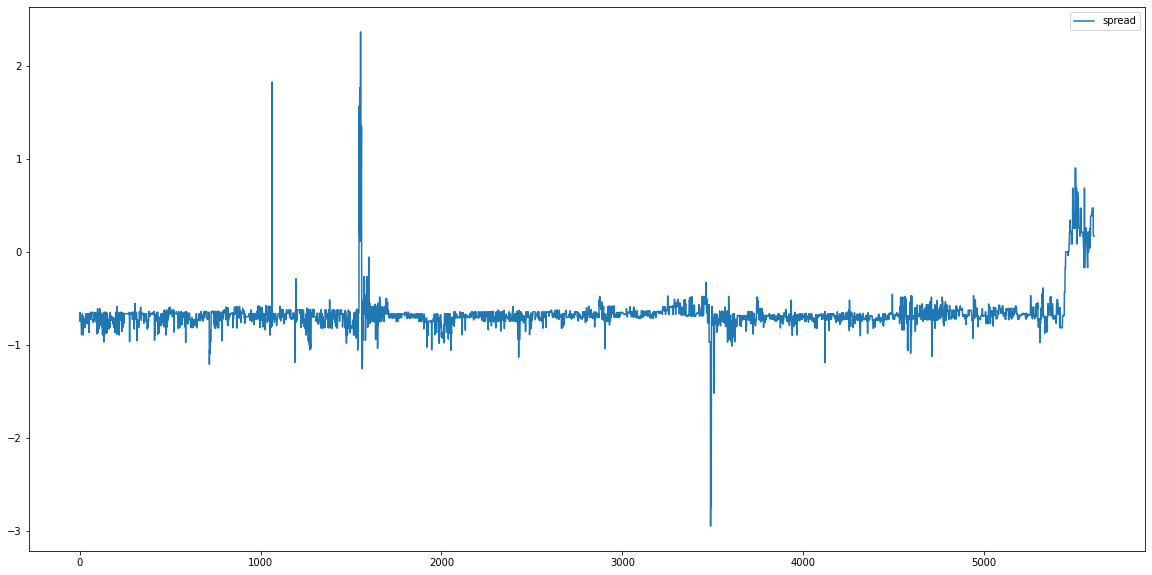

In [10]:
AL30D_TRADING.plot(figsize=(20,10))

<Axes: >

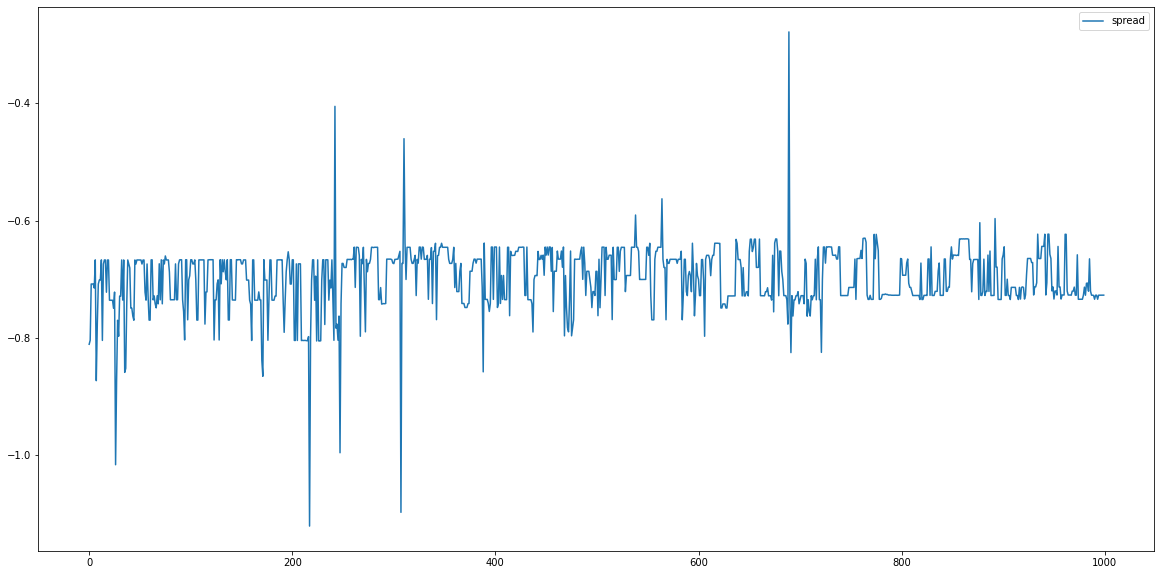

In [11]:
GD30D_TRADING[0:1000].plot(figsize=(20,10))

In [12]:
spreads_score_df_GD30D

,Start index,End index,Maximum Abs Value,Duracion_Trade,Score_Inicio_Trade
3,1295,1551,-2.952977,256,3
1,1239,1286,-0.898168,47,2
2,1287,1294,-0.722420,7,0
4,1553,1555,-0.668362,2,6
6,3489,3492,-0.666253,3,3
